# <b/> <font color='green'> <center> Gradient Boost Implementation </center></font>

In [33]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

## <b/> Data Loading

In [34]:
# loading the dataset
boston = pd.read_csv('boston_house_prices.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## <b/> Splitting Dataset

In [35]:
# splitting feature and target variables
x = boston.drop(['MEDV'], axis=1)
y = boston['MEDV']

In [36]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

## <b/> Model Training and Evaluation

In [37]:
# Initialize Gradient Boosting Regressor model with specified parameters
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=10, learning_rate=1.0)

In [38]:
# Fit the Gradient Boosting Regressor model to the training data
model = gbr.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

In [39]:
# Check model's r2 score
r2_score(y_test, y_pred)

0.8169316823417866

## <b/> Feature Importance Plot

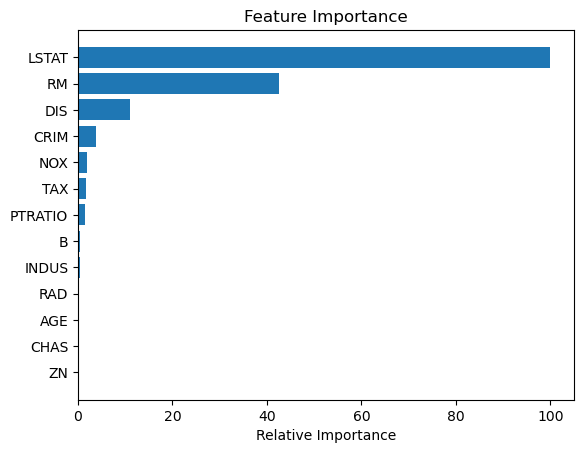

In [40]:
# Plot the important featues
feature_imp = model.feature_importances_

feature_imp = 100.0 * (feature_imp/feature_imp.max())
sorted_idx = np.argsort(feature_imp)
pos = np.arange(sorted_idx.shape[0]) + 0.5

plt.barh(pos, feature_imp[sorted_idx], align='center')
plt.yticks(pos, boston.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.show()

## <b/> Hyperparameter Tuning

In [41]:
# Define a dictionary of hyperparameters to tune and their corresponding values
parameters = {'learning_rate' : [0.15, 0.1, 0.10, 0.05],
              'n_estimators' : [100,150,200,250] }

# Initialize GridSearchCV with GradientBoostingRegressor as the estimator, 
tuning = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid = parameters, scoring='r2')

# Fit GridSearchCV to the training data to find the best combination of hyperparameters
tuning.fit(X_train, y_train)

# Print the best hyperparameters and score found by GridSearchCV
print(tuning.best_params_)
print(tuning.best_score_)

{'learning_rate': 0.15, 'n_estimators': 150}
0.8833627792483874


### Similarly other parameters like max_depth, split_criteria, min_sample_leafs, etc. can be tuned for more better model accuracy.